In [1]:
import numpy as np  # Importing NumPy for numerical operations and array manipulations

In [2]:
import matplotlib.pyplot as plt  # Importing Matplotlib for plotting graphs and visualizations

In [3]:
import seaborn as sns  # Importing Seaborn for statistical data visualization, built on top of Matplotlib

In [4]:
import tensorflow as tf  # Importing TensorFlow for building and training machine learning models

In [5]:
from tensorflow import keras  # Importing Keras, a high-level API for TensorFlow, to simplify model building

In [6]:
from tensorflow.keras import Layer  # Importing Layer class for creating custom layers in Keras

In [7]:
from tensorflow.keras.models import Sequential  # Importing Sequential model for building neural networks layer-by-layer

In [8]:
from tensorflow.keras.layers import Rescaling , GlobalAveragePooling2D

In [9]:
from tensorflow.keras import layers, optimizers, callbacks  # Importing various modules for layers, optimizers, and callbacks in Keras

In [10]:
from sklearn.utils.class_weight import compute_class_weight  # Importing function to compute class weights for imbalanced datasets

In [11]:
from tensorflow.keras.applications import EfficientNetV2B2  # Importing EfficientNetV2S model for transfer learning

In [12]:
from sklearn.metrics import confusion_matrix, classification_report  # Importing functions to evaluate model performance

In [13]:
import gradio as gr  # Importing Gradio for creating interactive web interfaces for machine learning models

In [13]:
import seaborn as sns


In [14]:
dataset_dir = r"C:\Users\91799\Downloads\Project\TrashType_Image_Dataset"
image_size = (124, 124)
batch_size = 32
seed = 42

In [15]:
train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="training",
    seed=seed,
    shuffle = True,
    image_size=image_size,
    batch_size=batch_size
)

Found 2527 files belonging to 6 classes.
Using 2022 files for training.


In [16]:
val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset="validation",
    seed=seed,
    shuffle = True,
    image_size=image_size,
    batch_size=batch_size
)
val_class= val_ds.class_names

Found 2527 files belonging to 6 classes.
Using 505 files for validation.


In [17]:
val_batches = tf.data.experimental.cardinality(val_ds)  
test_ds = val_ds.take(val_batches // 2)  
val_dat = val_ds.skip(val_batches // 2)  
test_ds_eval = test_ds.cache().prefetch(tf.data.AUTOTUNE) 

In [18]:
print(train_ds.class_names)
print(val_class)
print(len(train_ds.class_names))

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']
6


In [19]:
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
def preprocess(image, label):
    image = preprocess_input(image)
    return image, label
train_ds = train_ds.map(preprocess)
val_ds = val_ds.map(preprocess)

In [22]:
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras import layers, models
base_model = EfficientNetV2B2(
    input_shape=(124, 124, 3),
    include_top=False,
    weights='imagenet'  # Pretrained weights
)
base_model.trainable = False
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.2),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(6, activation='softmax')  # 6 classes
])
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ efficientnetv2-b2 (Functional)  │ (None, 4, 4, 1408)     │     8,769,374 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 1408)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       180,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,950,500 (34.14 MB)

 Trainable params: 181,126 (707.52 KB)

 Non-trainable params: 8,769,374 (33.45 MB)

In [31]:
import tensorflow as tf

IMG_SIZE = (124, 124)
BATCH_SIZE = 32

base_path = r"C:\Users\91799\Downloads\Project\dataset"

train_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(base_path, "train"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(base_path, "val"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    os.path.join(base_path, "test"),
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)


Found 1766 files belonging to 6 classes.
Found 503 files belonging to 6 classes.
Found 258 files belonging to 6 classes.


In [32]:
!pip install tensorflow

In [33]:
import os
import shutil
import random

# Set your local Windows paths
original_path = r"C:\Users\91799\Downloads\Project\TrashType_Image_Dataset"
output_base = r"C:\Users\91799\Downloads\Project\dataset"
split_ratios = (0.7, 0.2, 0.1)  # 70% train, 20% val, 10% test

# Optional: Clear existing dataset folders if they exist
if os.path.exists(output_base):
    shutil.rmtree(output_base)

# Create output directories
for split in ['train', 'val', 'test']:
    for class_name in os.listdir(original_path):
        class_dir = os.path.join(original_path, class_name)
        if os.path.isdir(class_dir):
            os.makedirs(os.path.join(output_base, split, class_name), exist_ok=True)

# Split and move images
for class_name in os.listdir(original_path):
    class_dir = os.path.join(original_path, class_name)
    if not os.path.isdir(class_dir):
        continue

    images = [img for img in os.listdir(class_dir) if not img.startswith('.')]
    random.shuffle(images)

    total = len(images)
    train_end = int(split_ratios[0] * total)
    val_end = int((split_ratios[0] + split_ratios[1]) * total)

    for i, img in enumerate(images):
        src = os.path.join(class_dir, img)

        if i < train_end:
            dst = os.path.join(output_base, "train", class_name, img)
        elif i < val_end:
            dst = os.path.join(output_base, "val", class_name, img)
        else:
            dst = os.path.join(output_base, "test", class_name, img)

        shutil.copy(src, dst)

print("✅ Dataset split into train/val/test successfully.")


✅ Dataset split into train/val/test successfully.


In [6]:
import os, shutil
import random

original_path = r"C:\Users\91799\Downloads\Project\TrashType_Image_Dataset"
output_base = r"C:\Users\91799\Downloads\Project\dataset"
split_ratios = (0.7, 0.2, 0.1)  # 70% train, 20% val, 10% test

# Create folders for train/val/test splits
for split in ['train', 'val', 'test']:
    for class_name in os.listdir(original_path):
        class_dir = os.path.join(original_path, class_name)
        if os.path.isdir(class_dir):
            os.makedirs(os.path.join(output_base, split, class_name), exist_ok=True)

# Split the data
for class_name in os.listdir(original_path):
    class_dir = os.path.join(original_path, class_name)
    if not os.path.isdir(class_dir):
        continue
    images = os.listdir(class_dir)
    random.shuffle(images)

    total = len(images)
    train_end = int(split_ratios[0] * total)
    val_end = int((split_ratios[0] + split_ratios[1]) * total)

    for i, img in enumerate(images):
        src = os.path.join(class_dir, img)

        if i < train_end:
            dst = os.path.join(output_base, "train", class_name, img)
        elif i < val_end:
            dst = os.path.join(output_base, "val", class_name, img)
        else:
            dst = os.path.join(output_base, "test", class_name, img)

        shutil.copy2(src, dst)

print("✅ Dataset split completed.")


✅ Dataset split completed.


In [1]:
import tensorflow as tf

IMG_SIZE = (124, 124)
BATCH_SIZE = 32
AUTOTUNE = tf.data.AUTOTUNE
dataset_path = r"C:\Users\91799\Downloads\Project\dataset"

train_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path + "/train",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int',
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path + "/val",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    dataset_path + "/test",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode='int'
)

# Prefetch for performance
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


Found 2308 files belonging to 6 classes.
Found 908 files belonging to 6 classes.
Found 490 files belonging to 6 classes.


In [2]:
from tensorflow.keras import layers, models
from tensorflow.keras.applications import EfficientNetV2B2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D

# ✅ Optional: Data augmentation
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
], name="data_augmentation")

# ✅ Load base EfficientNetV2B2
base_model = EfficientNetV2B2(include_top=False, input_shape=(124, 124, 3), weights="imagenet")
base_model.trainable = True

# ✅ Freeze first 200 layers to retain features
for layer in base_model.layers[:200]:
    layer.trainable = False

# ✅ Build final model
model = Sequential([
    data_augmentation,
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax')  # 6 classes
])

# ✅ Compile the model
model.compile(
    optimizer=Adam(learning_rate=1e-4),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# ✅ Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=25
)

Epoch 1/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 275s 3s/step - accuracy: 0.2785 - loss: 1.7320 - val_accuracy: 0.6674 - val_loss: 1.1276
Epoch 2/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 163s 2s/step - accuracy: 0.6039 - loss: 1.0907 - val_accuracy: 0.7676 - val_loss: 0.7218
Epoch 3/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 151s 2s/step - accuracy: 0.7319 - loss: 0.7668 - val_accuracy: 0.8304 - val_loss: 0.5492
Epoch 4/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.7894 - loss: 0.5994 - val_accuracy: 0.8546 - val_loss: 0.4430
Epoch 5/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 201s 2s/step - accuracy: 0.8334 - loss: 0.4868 - val_accuracy: 0.8700 - val_loss: 0.3834
Epoch 6/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.8694 - loss: 0.4101 - val_accuracy: 0.8899 - val_loss: 0.3376
Epoch 7/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.8833 - loss: 0.3532 - val_accuracy: 0.9020 - val_loss: 0.2968
Epoch 8/25
73/73 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.8971 - loss: 0.2981 - val_accuracy: 0.9053 - v

In [3]:
# Evaluate model on test dataset
loss, accuracy = model.evaluate(test_ds)
print(f"✅ Test Accuracy: {accuracy:.4f}")
print(f"✅ Test Loss: {loss:.4f}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 5s 258ms/step - accuracy: 0.9898 - loss: 0.0990
✅ Test Accuracy: 0.9837
✅ Test Loss: 0.1057


In [4]:
base_model.summary()


Model: "efficientnetv2-b2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 124, 124,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling           │ (None, 124, 124,  │          0 │ input_layer[0][0] │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization       │ (None, 124, 124,  │          0 │ rescaling[0][0]   │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 62, 62,    │        864 │ normalization[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 62, 62,    │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 62, 62,    │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_co… │ (None, 62, 62,    │      4,608 │ stem_activation[… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_bn  │ (None, 62, 62,    │         64 │ block1a_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_project_ac… │ (None, 62, 62,    │          0 │ block1a_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_co… │ (None, 62, 62,    │      2,304 │ block1a_project_… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_bn  │ (None, 62, 62,    │         64 │ block1b_project_… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_project_ac… │ (None, 62, 62,    │          0 │ block1b_project_… │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_drop        │ (None, 62, 62,    │          0 │ block1b_project_… │
│ (Dropout)           │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1b_add (Add)   │ (None, 62, 62,    │          0 │ block1b_drop[0][… │
│                     │ 16)               │            │ block1a_project_… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_conv │ (None, 31, 31,    │      9,216 │ block1b_add[0][0] │
│ (Conv2D)            │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_bn   │ (None, 31, 31,    │        256 │ block2a_expand_c… │
│ (BatchNormalizatio… │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block2a_expand_act… │ (None, 31, 31,    │          0 │ block2a_expand_b

 Total params: 8,769,374 (33.45 MB)

 Trainable params: 6,499,826 (24.79 MB)

 Non-trainable params: 2,269,548 (8.66 MB)

In [5]:
model.save("garbage_classifier_model.keras")


In [7]:
from IPython.display import FileLink

# Display a clickable download link
FileLink('garbage_classifier_model.keras')


C:\Users\91799\garbage_classifier_model.keras

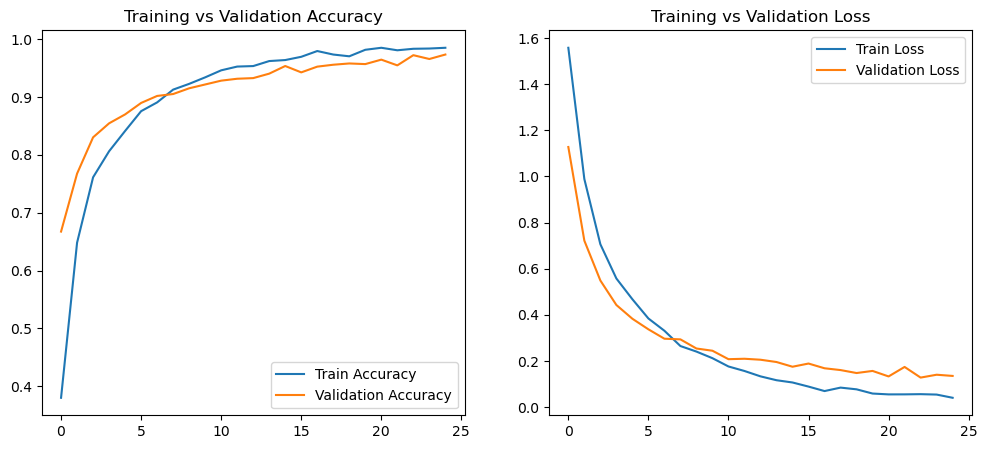

In [8]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Train Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Train Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()


In [11]:

test_ds_temp = tf.keras.utils.image_dataset_from_directory(
    r"C:\Users\91799\Downloads\Project\dataset\test",  # ✅ fixed path
    image_size=(124, 124),
    batch_size=32,
    shuffle=False
)
class_names = test_ds_temp.class_names
print(class_names)


Found 490 files belonging to 6 classes.
['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 237ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 273ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 244ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 250ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


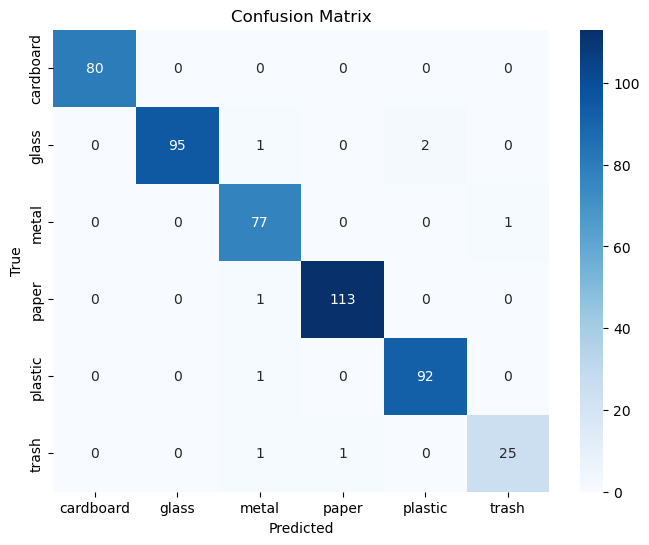

              precision    recall  f1-score   support

   cardboard       1.00      1.00      1.00        80
       glass       1.00      0.97      0.98        98
       metal       0.95      0.99      0.97        78
       paper       0.99      0.99      0.99       114
     plastic       0.98      0.99      0.98        93
       trash       0.96      0.93      0.94        27

    accuracy                           0.98       490
   macro avg       0.98      0.98      0.98       490
weighted avg       0.98      0.98      0.98       490



In [17]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# Make sure y_true and y_pred are already defined
# Example if you haven't done it yet:
y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

# ✅ Step 1: Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# ✅ Step 2: Plot confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

# ✅ Step 3: Classification report
print(classification_report(y_true, y_pred, target_names=class_names))


In [18]:
model.save("garbage_classifier_model.keras")


In [8]:
import gradio as gr
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.efficientnet_v2 import preprocess_input
from PIL import Image
import numpy as np

model = load_model("garbage_classifier_model.keras")
class_names = ['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

def classify_image(img):
    img = img.resize((124, 124))
    img_array = np.array(img, dtype=np.float32)
    img_array = preprocess_input(img_array)
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    index = np.argmax(predictions)
    return f"{class_names[index]} ({predictions[0][index]:.2f} confidence)"

iface = gr.Interface(fn=classify_image, inputs=gr.Image(type='pil'), outputs="text")
iface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7862
* Running on public URL: https://c227cd7212155a3568.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
